# Crop and paste images
This notebook was translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/crop_and_paste/).

It shows how  to crop and paste images in the GPU.

## Initialize GPU

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("GTX")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with GTX in their name. Using gfx1035 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<gfx1035 on Platform: AMD Accelerated Parallel Processing (2 refs)>

## Get example data and push it to the GPU

cl.OCLArray([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32)
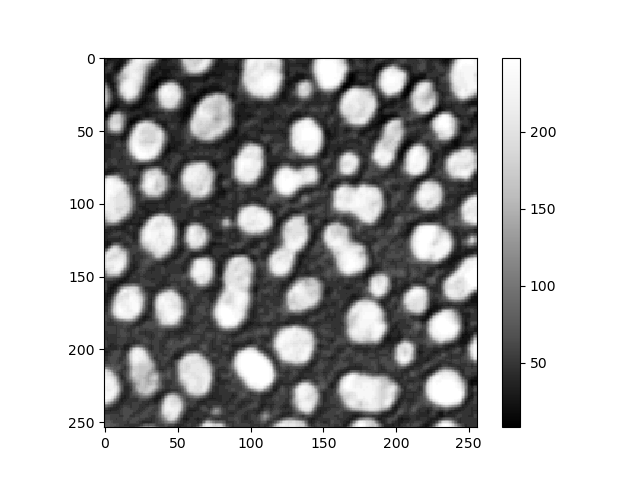
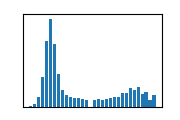

In [2]:
# load data
image = cle.asarray(imread('https://samples.fiji.sc/blobs.png'))
image

## Crop out a part of the image

cl.OCLArray([[ 64., 104., 136., ...,  32.,  40.,  40.],
       [ 88., 112., 144., ...,  32.,  40.,  40.],
       [104., 128., 144., ...,  32.,  40.,  40.],
       ...,
       [112.,  96.,  72., ...,  32.,  40.,  40.],
       [144., 120.,  96., ...,  40.,  48.,  48.],
       [168., 144., 120., ...,  48.,  56.,  56.]], dtype=float32)
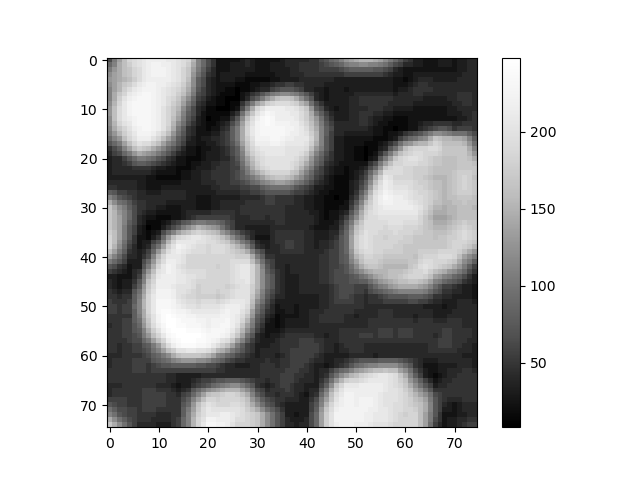
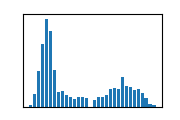

In [3]:
width = 75
height = 75
tile = cle.create([height, width])

x = 10
y = 10
cle.crop(image, tile, x, y)

tile

## Create output image
We create an empty image and make a collage by pasting the cropped image into it. We also transform the cropped image for visualisation purpose:

cl.OCLArray([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)
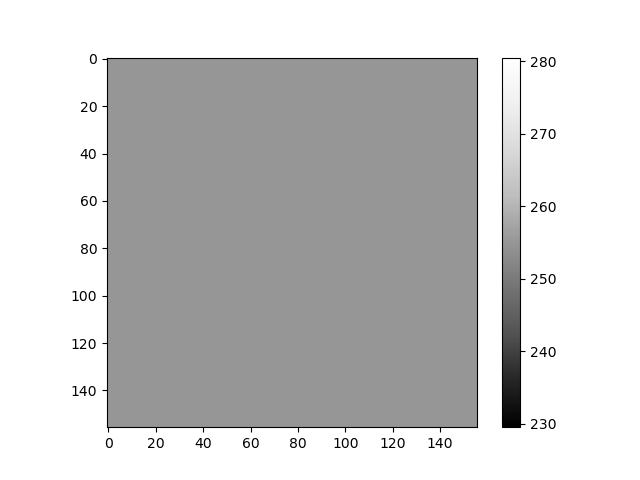
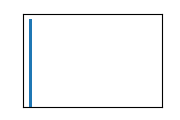

In [4]:
collage = cle.create([width * 2 + 6, height * 2 + 6])

# "white" background
cle.set(collage, 255)

collage

## Paste tiles

cl.OCLArray([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255.,  64., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)
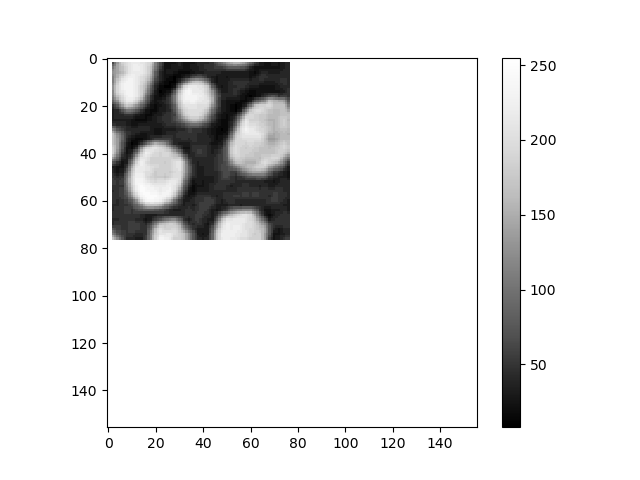
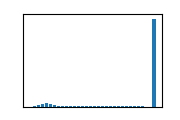

In [5]:
cle.paste(tile, collage, 2, 2)

collage

cl.OCLArray([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255.,  64., ...,  64., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)
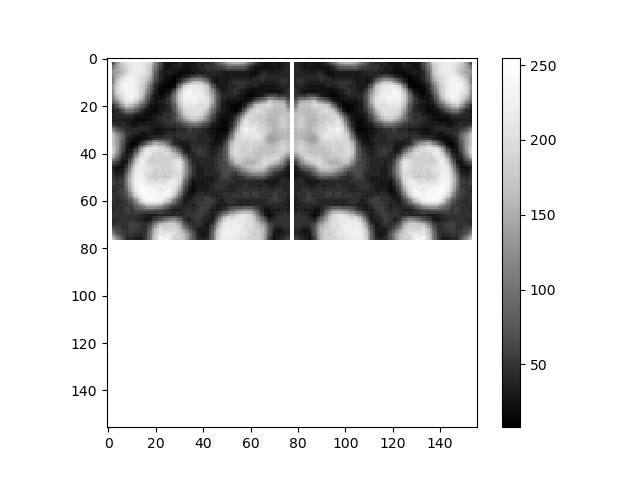
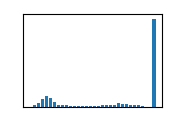

In [6]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flip_tile, collage, width + 4, 2)

collage

cl.OCLArray([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255.,  64., ...,  64., 255., 255.],
       ...,
       [255., 255., 255., ...,  64., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)
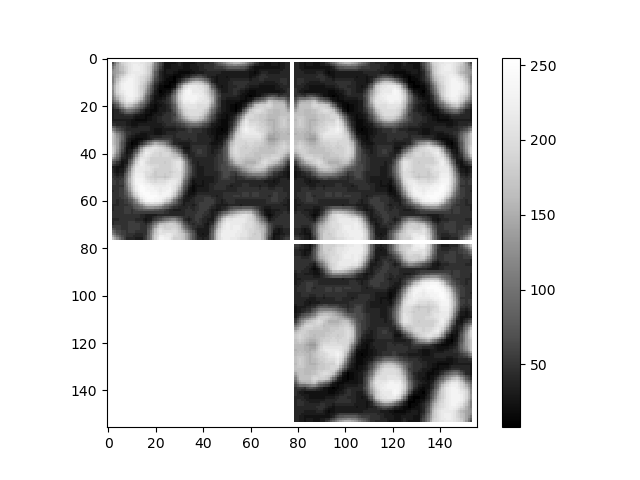
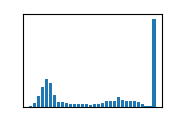

In [7]:
flip_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flip_tile, collage, width + 4, height + 4)

collage

cl.OCLArray([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255.,  64., ...,  64., 255., 255.],
       ...,
       [255., 255., 168., ...,  64., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)
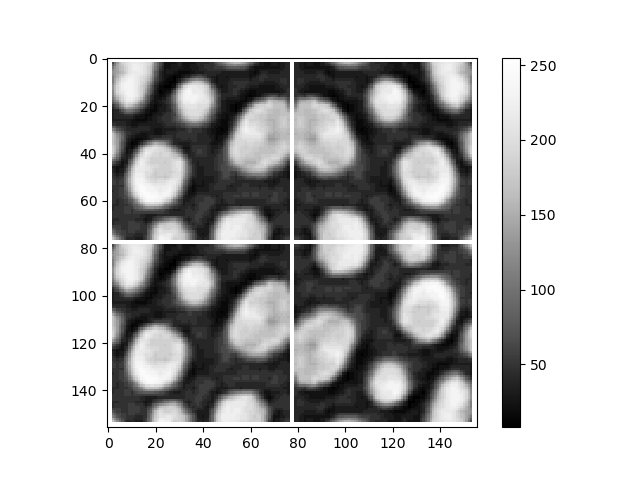
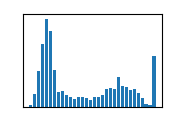

In [8]:
flip_tile = cle.flip(tile, flip_x=False, flip_y=False)
cle.paste(flip_tile, collage, 2, height + 4)

collage